# 007. CNN - MNIST Keras

**Сверточная нейронная сеть (англ. convolutional neural network, CNN)** — специальная архитектура нейронных сетей, изначально нацеленная на эффективное распознавание изображений.

**Структура сверточной нейронной сети**
CNN состоит из разных видов слоев: сверточные (convolutional) слои, субдискретизирующие (subsampling, подвыборка) слои и слои «обычной» нейронной сети – персептрона.
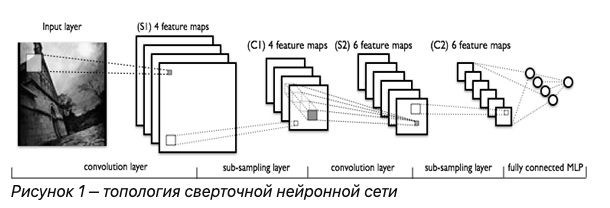

### Визуализация свертки и подвыборки
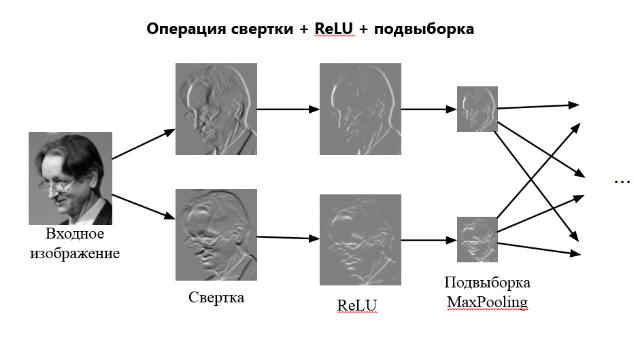

### Модель нейрона
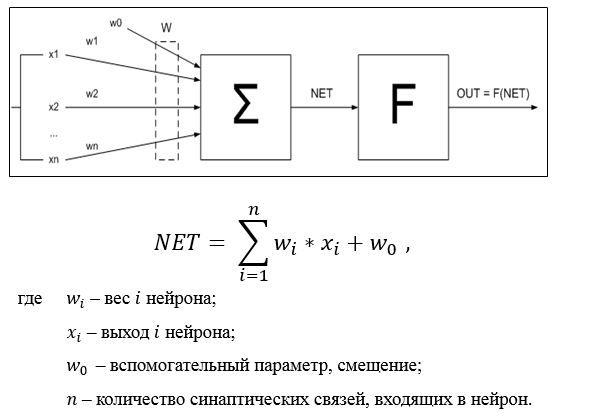

### CNN Topology
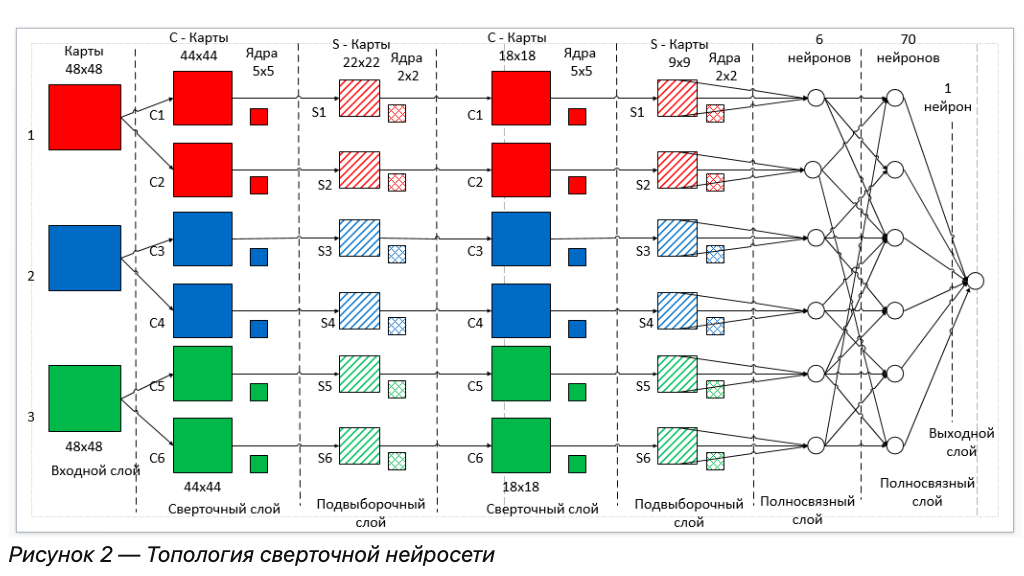

In [ ]:
# pip install opencv-python

In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

import numpy as np
import cv2
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

In [9]:
from keras.utils import np_utils
from keras.datasets import mnist 

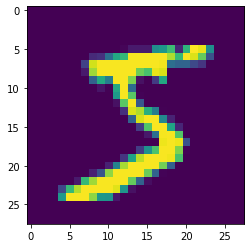

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
plt.imshow(X_train[0])
plt.show()

In [10]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [11]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
model = Sequential()

2022-11-21 16:56:20.413200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2157 - accuracy: 0.9340
Epoch 2/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0850 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0538 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0494 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0430 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0379 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0349 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 10/10
1875/1875 [==============================] - 96s 

In [ ]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
    probs = model.predict(X_test[np.newaxis, i])
    prediction = probs.argmax(axis=1)
 
    image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
 
    print("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
    cv2.imshow("Digit", image)
    cv2.waitKey(0)  

1/1 [==============================] - 0s 225ms/step
Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***